In [1]:
# imports modules that we will need
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# upload documnet
datafile=pd.read_csv("DatasetAfricaMalaria.csv")
datafile

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,...,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,...,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,...,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,...,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


<h3>Cleaning process</h3>

In [3]:
# start by identifying all the columns in the dataset
datafile.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total population)',
       'Rural popula

In [4]:
# perform a value count for datafile to know how many elements to expect from each column
datafile.count()
# datafile

Country Name                                                                               594
Year                                                                                       594
Country Code                                                                               594
Incidence of malaria (per 1,000 population at risk)                                        550
Malaria cases reported                                                                     550
Use of insecticide-treated bed nets (% of under-5 population)                              132
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    122
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      106
People using safely managed drinking water services (% of population)                       99
People using safely managed drinking water services, rural (% of rural population)          88
People using safely managed drinking water service

In [5]:
# Most of the columns on access to drinking water services are empty
# Use of these will lead to misinformation
# and I can not fill them with fillna(bfill, ffill) as they have gaps and the averagee will me misinformed as there 
# are a lot of gaps in between
listy=["People using safely managed drinking water services (% of population)",
                       "People using safely managed drinking water services, rural (% of rural population)",
                       "People using safely managed drinking water services, urban (% of urban population)",
                        "Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)",
                        "Use of insecticide-treated bed nets (% of under-5 population)",
                        "Children with fever receiving antimalarial drugs (% of children under age 5 with fever)",
                        "People using safely managed sanitation services (% of population)",
                        "People using safely managed sanitation services, rural (% of rural population)",
                        "People using safely managed sanitation services, urban  (% of urban population)"
                       ]
# dropping the rows in the list above
for i in listy:
    datafile=datafile.drop([i], axis='columns')



In [6]:
datafile.count()

Country Name                                                                          594
Year                                                                                  594
Country Code                                                                          594
Incidence of malaria (per 1,000 population at risk)                                   550
Malaria cases reported                                                                550
Rural population (% of total population)                                              588
Rural population growth (annual %)                                                    588
Urban population (% of total population)                                              588
Urban population growth (annual %)                                                    588
People using at least basic drinking water services (% of population)                 588
People using at least basic drinking water services, rural (% of rural population)    566
People usi

In [7]:
# used bfill to fill it with similar content in specific countries
# SO if the country is Rwanda then it is filled with similar data from Rwanda  
all_countries=datafile["Country Name"].drop_duplicates()
for i in all_countries:
    datafile.loc[(datafile["Country Name"]==i)]=datafile.fillna(method="bfill")

In [8]:
datafile.count()

Country Name                                                                          594
Year                                                                                  594
Country Code                                                                          594
Incidence of malaria (per 1,000 population at risk)                                   594
Malaria cases reported                                                                594
Rural population (% of total population)                                              594
Rural population growth (annual %)                                                    594
Urban population (% of total population)                                              594
Urban population growth (annual %)                                                    594
People using at least basic drinking water services (% of population)                 594
People using at least basic drinking water services, rural (% of rural population)    594
People usi

<h3>Data Analysis</h3>

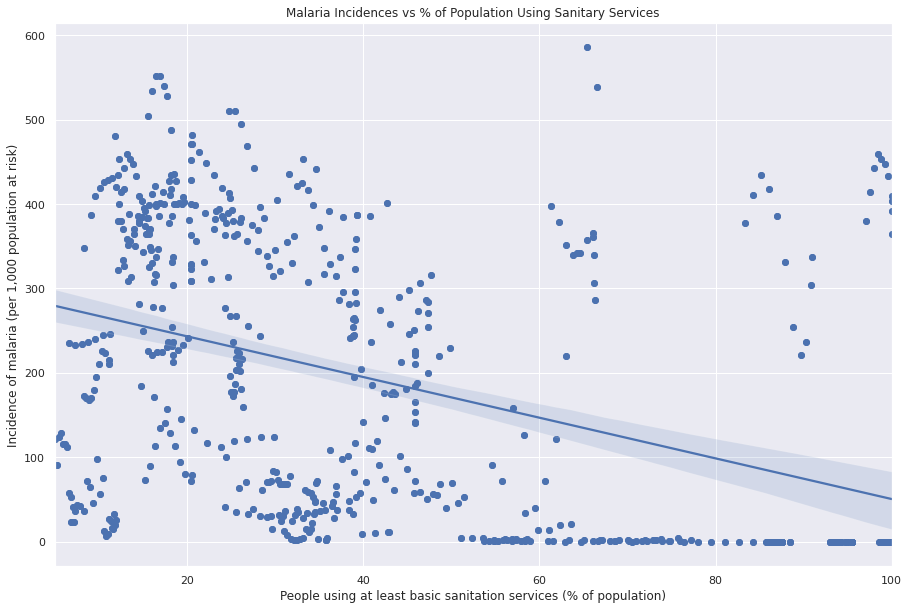

In [9]:
# Malaria cases against percentage of people using sanitary services
sns.set()
plt.scatter(datafile["People using at least basic sanitation services (% of population)"],datafile["Incidence of malaria (per 1,000 population at risk)"])
ax = sns.regplot(x=datafile["People using at least basic sanitation services (% of population)"], y=datafile["Incidence of malaria (per 1,000 population at risk)"], data=datafile)
plt.title("Malaria Incidences vs % of Population Using Sanitary Services")
fig = plt.gcf()
fig.set_size_inches(15.0, 10.0)

<h4>Conclusion</h4>

Shows a negative linear relationship. Meaning with the increase of sanitary service use by the population lead to a drop in the number of malaria cases

In [10]:
# Number of Malaria Incidences per 1000 people cases each year
plt.line(datafile["Year"], datafile["Incidence of malaria (per 1,000 population at risk)"])
fig = plt.gcf()
fig.set_size_inches(15.0, 10.0)
plt.title("Malaria Incidences per 1000 people over the years")
plt.xlabel("Years")
plt.ylabel("Malaria Incidences per 1000 people")

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'

In [ ]:
# Population growth over the years
plt.bar(datafile["Year"], datafile["Rural population growth (annual %)"], label="Rural Growth %")
plt.bar(datafile["Year"], datafile["Urban population growth (annual %)"], label="Urban Growth %")
plt.legend(loc="upper left")
fig = plt.gcf()
fig.set_size_inches(15.0, 10.0)
plt.title("Population growth rate over the years")
plt.xlabel("Years")
plt.ylabel("Population growth rate Urban vs Rural")


<h4>Conclusion</h4>
Number of growth = More Malaria cases in correlation to the bar graph above

In [ ]:
# Malaria cases against percentage of people using sanitary services
sns.set()
plt.scatter(datafile["latitude"],datafile["Incidence of malaria (per 1,000 population at risk)"])
plt.scatter(datafile["longitude"],datafile["Incidence of malaria (per 1,000 population at risk)"])
ax = sns.regplot(x=datafile["latitude"], y=datafile["Incidence of malaria (per 1,000 population at risk)"], data=datafile)
ax = sns.regplot(x=datafile["longitude"], y=datafile["Incidence of malaria (per 1,000 population at risk)"], data=datafile)
plt.title("Malaria Incidences vs Latitude and Longitude")
plt.xlabel("Longitude/Latitude")
fig = plt.gcf()
fig.set_size_inches(15.0, 10.0)

<h4>Conclusion</h4>
region likely to have the most cases was nearer to +13 degrees latitude +13 degree longitude (approximate) which according to the Map is in Northern NIgeria.
There was also an increase in the number of cases coming to the equator and heading to Northern/West Africa which can be attributed to the Mosquito friendly climate and the larger population

<h3>Model Training and Use</h3>

In [11]:
# importing the needed moduluses
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [18]:
lrg=LinearRegression()
# dropping the country code and Malaria cases which is the target
for_training=datafile.drop(['Country Code',"Malaria cases reported","geometry"], axis=1)
target_value=datafile["Malaria cases reported"]
# splitting it to a train and test data
x_train, x_test, y_train, y_test=train_test_split(for_training,target_value, test_size=0.1, random_state=10)



In [19]:
# Create dummy variables
# le=LabelEncoder()
trainle, testle=x_train,x_test

In [20]:
# for i in ["Country Name","Year"]:
#     trainle[i]=le.fit_transform(trainle[i])
#     testle[i]=le.fit_transform(testle[i])

In [21]:
# The handle unknown argmument makes sure it ignores any new categories it had not seen
ohe=OneHotEncoder()

# Using a transofmer I can pick the select columns that are to be One Hot Encoded
from sklearn.compose import make_column_transformer
column_trans=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),["Country Name","Year"]),remainder='passthrough' )


# making a pipeline that will do the following steps o  the data
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(column_trans, lrg)

In [22]:
# training the model
pipe.fit(trainle,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country Name', 'Year'])])),
                ('linearregression', LinearRegression())])

In [23]:
pipe.score(testle,y_test)

0.6968605402665771